In [33]:
import pandas as pd
import numpy as np
from evalutation_networks import EvaluationNetwork
import human_mobility_networks as hm
from scipy.stats import ks_2samp
from tacoma.api import measure_group_sizes_and_durations
from tacoma.api import degree_distribution
import matplotlib.pyplot as plt

In [2]:
# Initiate empiriacal network
EN = EvaluationNetwork('gallery')
EN.to_tacoma_tn()

# Initiate human mobility model approximation
EN.eval_df_to_trajectory(180)

Loc_kwargs = {'spaces_x': 3, 'spaces_y':3, 'space_dim_x':10, 'space_dim_y':10}
Loc = hm.Location(f'{EN.name}_{EN.name_identifier}', **Loc_kwargs)
EN.hm_approximation(Loc, 'RWP', 20)

edge list errors:  0
edge changes errors:  0
start
29180
(29180, 109, 2)
finished simulation 
start working on network
0
10000
20000
edge list errors:  0
edge changes errors:  0


# Calculate KS-statistics for contact times, ICT and time averaged degree

In [29]:
def ks_statistics(tn1, tn2):
    duration_measurement1 = measure_group_sizes_and_durations(tn1)
    ict1 = duration_measurement1.group_durations[1]
    cd1 = duration_measurement1.contact_durations

    duration_measurement2 = measure_group_sizes_and_durations(tn2)
    ict2 = duration_measurement2.group_durations[1]
    cd2 = duration_measurement2.contact_durations

    degree_measurement1 = np.array(degree_distribution(tn1))
    degree_measurement2 = np.array(degree_distribution(tn2))
    degree_measurement1 = degree_measurement1[degree_measurement1 > 0]
    degree_measurement2 = degree_measurement2[degree_measurement2 > 0]
    return ks_2samp(degree_measurement1, degree_measurement2)

ks_statistics(EN.tn, EN.tn_approx)

KstestResult(statistic=0.2857142857142857, pvalue=0.9090909090909092, statistic_location=6.288082197810489e-05, statistic_sign=-1)

Text(0.5, 1.0, '$\\bar d(t)$')

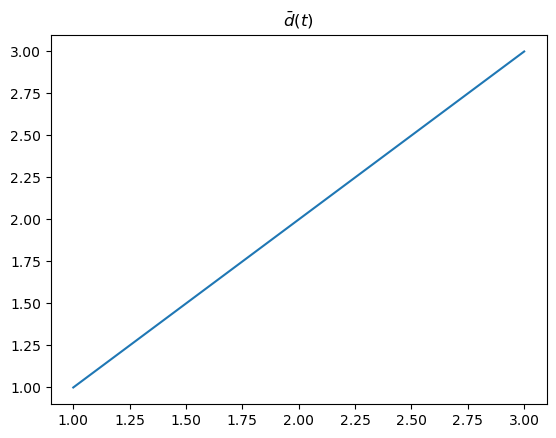

In [38]:
title = r'$\bar d(t)$'
plt.plot([1, 2, 3], [1, 2, 3])
plt.title(title)